## HW03 Solution

In [19]:
import pandas as pd
import numpy as np
import math
from scipy.stats import moment
import seaborn as sns
import matplotlib.pyplot as plt


### Exercise 4.35  (9%：每小題各3%)
Since the data has a bell-shaped distribution, we can apply the Empirical Rule.  
(46, 54) = (mean - s, mean + s) contains approximately 68% of the measurements.  
(42, 58) = (mean-2s, mean+2s) contains approximately 95% of the measurements.  
(38, 62) = (mean-3s, mean+3s) contains approximately 99.7% of the measurements.  

### Exercise 4.41  (15%：每個var, std各2%, (b)3%)
此題data為樣本，假設資料單位為 m  
(a)

In [2]:
df41 = pd.read_excel('Xr04-41.xlsx')

print("var of Punter 1 =", df41["Punter 1"].var(),"m2")
print("var of Punter 2 =", df41["Punter 2"].var(),"m2")
print("var of Punter 3 =", df41["Punter 3"].var(),"m2")
print("\n")
print("std of Punter 1 =", df41["Punter 1"].std(),"m")
print("std of Punter 2 =", df41["Punter 2"].std(),"m")
print("std of Punter 3 =", df41["Punter 3"].std(),"m")

var of Punter 1 = 40.21591836734694 m2
var of Punter 2 = 14.806530612244902 m2
var of Punter 3 = 3.633061224489794 m2


std of Punter 1 = 6.341602192454753 m
std of Punter 2 = 3.847925494632777 m
std of Punter 3 = 1.9060590821088925 m


(b) (略)

### Exercise 4.47  (9%：mean, std, describe各3%)
假設資料單位為dollar

In [3]:
df47 = pd.read_excel('Xr04-47.xlsx')

print("mean of Property tax =", df47["Property tax"].mean(),"dollars")
print("std of Property tax =", df47["Property tax"].std(),"dollars")

mean of Property tax = 1937.3162857142854 dollars
std of Property tax = 949.9909560675101 dollars


Describe: 大多答案包含利用Chebyshev定理推論數值區間、利用positive skewed的前提推斷mean, median, mode大小等。

### Exercise 4.61   (9%：每小題各3%)

In [16]:
def percentile(data1, p):
    if type(data1) == np.ndarray:        
        alldata = data1.copy()
        data1 = data1.copy()
    else:
        alldata = data1.values.copy()
        data1 = data1.values.copy()
    alldata.sort()
    n = alldata.size
    l = (n + 1) * p / 100 - 1
    f_l = math.floor(l)
    c_l = math.ceil(l)
    percentile_v = alldata[f_l] + (alldata[c_l] - alldata[f_l]) * (l - f_l)
    return percentile_v

In [5]:
r61 = np.array([10.5, 14.7, 15.3, 17.7, 15.9, 12.2, 10.0, 14.1, 13.9, 18.5, 13.9, 15.1, 14.7])

p25 = percentile(r61, 25)
p50 = percentile(r61, 50)
p75 = percentile(r61, 75)

print("Q1 = ", p25)
print("Q2 = ", p50)
print("Q3 = ", p75)

Q1 =  13.05
Q2 =  14.7
Q3 =  15.600000000000001


### Exercise 4.67  (3%)

In [9]:
df67 = pd.read_excel('Xr04-67.xlsx')

r67 = df67['Speeds'].to_numpy()
p85 = percentile(r67, 85)

print("The correct limit should be", p85, 'mph')

The correct limit should be 75.0 mph


### Exercise 4.75   (12%：Q各3%，describe3%)

In [7]:
df75 = pd.read_excel('Xr04-75.xlsx')

In [17]:
r75 = df75['Mortgage Deduction'].to_numpy()

p25 = percentile(r75, 25)
p50 = percentile(r75, 50)
p75 = percentile(r75, 75)

print("Q1 = ", p25, 'dollars')
print("Q2 = ", p50, 'dollars')
print("Q3 = ", p75, 'dollars')

Q1 =  9836.97277836036 dollars
Q2 =  12224.261765298434 dollars
Q3 =  14597.98836724367 dollars


### Compute and interpret coefficients of Skewness and Kurtosis for 4.67 and 4.75  
### 每題9%(skewness 3%，kurtosis 3%，interpret 3%(需提到Skewness and Kurtosis，只有一個則-1.5%))，共18%

In [2]:
df67 = pd.read_excel('Xr04-67.xlsx')

In [3]:
m2 = moment(df67, moment=2)
m3 = moment(df67, moment=3)
m4 = moment(df67, moment=4)
skew_f = m3 / pow(pow(m2, 0.5), 3)
print("skewness = ", skew_f)
kurtosis_f = m4 / pow(m2, 2)
print("kurtosis = ", kurtosis_f) 

skewness =  [0.11491526]
kurtosis =  [3.53531935]


In [4]:
df75 = pd.read_excel('Xr04-75.xlsx')

In [5]:
m2 = moment(df75, moment=2)
m3 = moment(df75, moment=3)
m4 = moment(df75, moment=4)
skew_f = m3 / pow(pow(m2, 0.5), 3)
print("skewness = ", skew_f)
kurtosis_f = m4 / pow(m2, 2)
print("kurtosis = ", kurtosis_f) 

skewness =  [-0.02519243]
kurtosis =  [2.68429489]


### Compute and interpret covariance and r for 4.95 and 4.101
### 每題12%(scatter plot 3%，covariance 3%，r 3%，interpret 3%(需提到covariance and r，只有一個則-1.5%))，共24%
* 4.101有做'Home Attendance' 和'wins' 就算對
* Correlation: positive/negative 0.5%, very/moderately weak/string 0.5%, linear relationship 0.5%

In [25]:
df95 = pd.read_excel('Xr04-95.xlsx')

In [51]:
def LinearRelationship(X, y, data, yunit = ''):
    _ = sns.regplot(x= X, y= y, data = data, color = 'r', ci = None)
    plt.title('Scatter Plot for ' + X +' vs.' + y)
    if yunit:
        plt.ylabel('Alcohol' + ' (' + yunit + ')')
    plt.show()

    #Compute the covariance matrix
    cov_mat = np.cov(data[[X, y]].values, rowvar = False)
    print(cov_mat)
    print('covariance = ', cov_mat[1][0])

    #Compute the correlation matrix
    cor_mat = np.corrcoef(data[[X, y]].values, rowvar = False)
    print('r = ', cor_mat[1][0])

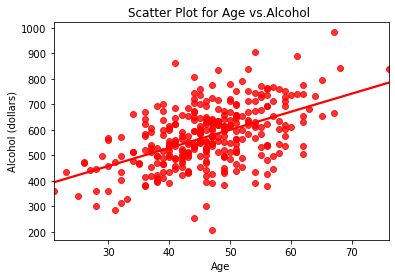

covariance =  531.5122314147967
r =  0.514438703804137


In [47]:
LinearRelationship('Age', 'Alcohol ', df95, 'dollars')

In [48]:
df101 = pd.read_excel('Xr04-101.xlsx')

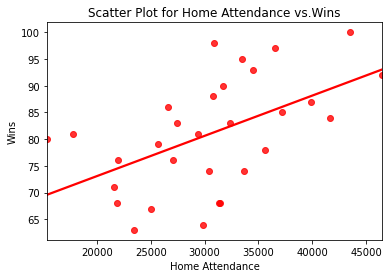

[[5.31794186e+07 4.00912816e+04]
 [4.00912816e+04 1.09274713e+02]]
covariance =  40091.281609195394
r =  0.5259183337997146


In [52]:
LinearRelationship('Home Attendance', 'Wins', df101)

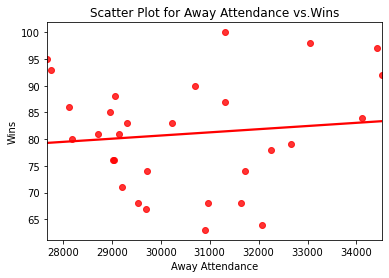

covariance =  2283.9643678160924
r =  0.111460523465819


In [50]:
LinearRelationship('Away Attendance', 'Wins', df101)